For Errors: MSE, BCE, CCE

For Solvers: Sgd adam lbfgs

For activation : Logistic/Sigmoid ReLU and 

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

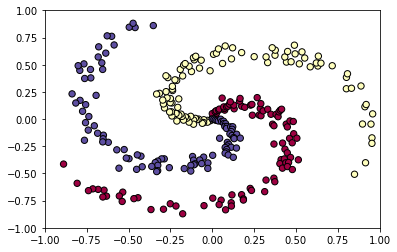

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [3]:
h = 100 #No.ofneurons

W = 0.01 * np.random.randn(D,h) #Dimension of weights is (2,100)

b = np.zeros((1,h)) #Dimensions (1,100)

W2 = np.random.randn(h,K) #Dimensions (100,3)

b2 = np.zeros((1,K)) #Dimensions (1,3)

In [5]:
step_size=1e-0
reg=1e-3
no_of_examples=300
for i in range(10000):
    
    #FWD. PROPOGATION
    #(1) Generate class scores
    hidden_layer = np.maximum(0,np.dot(X,W) + b) 
    #output
    scores = np.dot(hidden_layer,W2) +b2  #(300,3)
    
    #(2) Compute class probablities
    exp_scores=np.exp(scores) #(300,3)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True) #(300,3)
    
    #(3) Calculate Loss
    correct_logprops = -np.log( probs[range(no_of_examples),y]) #(300,1)
    data_loss = np.sum(correct_logprops) / no_of_examples #(300)
    
    #(4) Regularization
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss=data_loss + reg_loss
    
    if i%1000==0:
        print(f"iter {i}: loss {loss}")

iter 0: loss 1.2621665765049108
iter 1000: loss 1.2621665765049108
iter 2000: loss 1.2621665765049108
iter 3000: loss 1.2621665765049108
iter 4000: loss 1.2621665765049108
iter 5000: loss 1.2621665765049108
iter 6000: loss 1.2621665765049108
iter 7000: loss 1.2621665765049108
iter 8000: loss 1.2621665765049108
iter 9000: loss 1.2621665765049108
